In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IUH - sample_01.csv")

In [3]:
df

,datetime,sales_mobile,sales_fashion,sales_groceries,Unnamed: 4
0,5/1/20,31.0,18.0,13.0,NaN
1,5/2/20,65.0,42.0,9.0,NaN
2,5/3/20,90.0,29.0,19.0,NaN
3,5/4/20,31.0,48.0,18.0,NaN
4,5/5/20,72.0,22.0,19.0,NaN
...,...,...,...,...,...
59,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.head(31)
df

,datetime,sales_mobile,sales_fashion,sales_groceries,Unnamed: 4
0,5/1/20,31.0,18.0,13.0,NaN
1,5/2/20,65.0,42.0,9.0,NaN
2,5/3/20,90.0,29.0,19.0,NaN
3,5/4/20,31.0,48.0,18.0,NaN
4,5/5/20,72.0,22.0,19.0,NaN
5,5/6/20,37.0,43.0,16.0,NaN
6,5/7/20,37.0,31.0,16.0,NaN
7,5/8/20,29.0,45.0,7.0,NaN
8,5/9/20,77.0,47.0,6.0,NaN
9,5/10/20,84.0,39.0,7.0,NaN


In [5]:
data = pd.read_csv("data_iuh.csv")
data

,datetime,mobile
0,1,31
1,2,65
2,3,9
3,4,31
4,5,72
5,6,37
6,7,37
7,8,29
8,9,77
9,10,84


In [6]:
x = data["datetime"]
y = df["sales_groceries"]

In [7]:
X = data.values[:, 0]
y = df.values[:, 3]

In [8]:
y

array([13.0, 9.0, 19.0, 18.0, 19.0, 16.0, 16.0, 7.0, 6.0, 7.0, 8.0, 8.0,
       12.0, 6.0, 11.0, 18.0, 7.0, 19.0, 19.0, 17.0, 17.0, 6.0, 19.0,
       12.0, 5.0, 12.0, 15.0, 5.0, 14.0, 15.0, 19.0], dtype=object)

-1.2500918937292769
-0.06555325675633447
[380.14754030317755, 597.9450068421914, 776.5150909583033, 911.2481807669285, 1008.5546119962628, 1077.0689210041376, 1124.56503599721, 1157.1672701116488, 1179.4035011663368, 1194.506183005224, 1204.7353853661791, 1211.6509422177478, 1216.3205066774244, 1219.4709114933557, 1221.5952085689805, 1223.0270737821372, 1223.9919688507755, 1224.6420757001742, 1225.0800413675972, 1225.375068653423, 1225.5737979710534, 1225.7076566832307, 1225.7978181989893, 1225.858546193302, 1225.8994489023014, 1225.9269983000877, 1225.945553688996, 1225.9580512886305, 1225.9664687708562, 1225.9721381717902]
Giá trị dự đoán
12.435365680536433


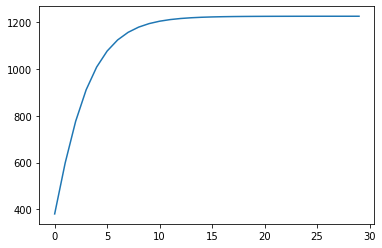

In [9]:
# tạo các hàm để thuật toán "học"
def equation(new_date, m, b): # đưa các tham số vào chương trình
    return m*new_date + b
# tạo hàm lỗi
def cost_function(X, y, m, b): # đưa các tham số của hàm số mất mát trong linear regression
    n = len(X)
    error = 0
    for i in range(n):
        error += (y[i] - (m*X[i] + b))**2
        
    return error/n

def update(X, y, m, b, learning_rate): # đạo hàm của linear regression
    n = len(X)
    m_update = 0.0
    b_update = 0.0
    for i in range(n):
        m_update += -2*X[i]*(y[i] - (X[i]*m + b))
        b_update += -2*(y[i] - (X[i]*m + b))
    m = (m_update/n)*learning_rate
    b = (b_update/n)*learning_rate
    return m, b

def train(X, y, m, b, learning_rate, iter):
    cost_hist = []
    for i in range(iter):
        m , b = update(X, y, m, b, learning_rate)
        cost = cost_function(X, y, m, b)
        cost_hist.append(cost)
    return m ,b, cost_hist
m , b, cost = train(X, y, 0.03, 0.76, 0.001, 30)
print(m)
print(b)
print(cost)
print("Giá trị dự đoán")
print(equation(-32, m, b))

solanlap = [i for i in range(30)]
plt.plot(solanlap, cost)
plt.show()